### Zadanie

1. Načítajte súbor `Accidents.csv`, rozdeľte ho na tri tabuľky podľa hodnôt atribútu `Accident_Severity` (do prvej tabuľky vyberte iba hodnoty 1 - `Fatal`, do druhej 2 - `Serious` a do tretej 3 - `Slight`). (2b)



In [107]:
import pandas as pd
import numpy as np

In [152]:
data = pd.read_csv('./data/Accidents.csv')
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [153]:
Fatal = data[data['Accident_Severity'] == 1]
Serious = data[data['Accident_Severity'] == 2]
Slight = data[data['Accident_Severity'] == 3]
print(data.shape)
print(Fatal.shape)
print(Serious.shape)
print(Slight.shape)

(198735, 32)
(2913, 32)
(25029, 32)
(170793, 32)


2. Z tabuľky pre hodnoty `Slight` náhodne vyberte 10% príkladov pomocou metódy `sample`. Nasledujúci príklad kódu zobrazuje použitie tejto metódy. (2b)

In [154]:
# `frac` udáva koľko príkladov sa má náhodne vybrať (0.1 = 10%), `random_state` inicializuje generátor
# náhodných čísel, aby sme vždy dostali rovnaký výber
sample_data = Slight.sample(frac=0.1, random_state=1234)

In [155]:
accidents_slight_sample = Slight.sample(frac=0.1, random_state=1234)
print(accidents_slight_sample.shape)

(17079, 32)


3. Spojte všetky tri tabuľky do upravenej tabuľky `Accidents`, ktorá bude obsahovať 10% príkladov `Slight` a všetky príklady závažnosti `Fatal` a `Serious`. Po spojení by ste mali mať 29 650 príkladov. (2b)

In [156]:
Accidents = pd.concat([accidents_slight_sample, Fatal, Serious], axis =0)
print(Accidents.shape)

(45021, 32)


4. Spojte upravenú tabuľku `Accidents` s tabuľkou `Vehicles` podľa kľúča `Accident_Index` tak, aby vo výslednej tabuľke boli iba vozidla nehôd z upravenej tabuľky `Accidents`. Po spojení by ste mali dostať redukovanú trénovaciu množinu s menším počtom príkladov, ktorú budete ďalej používať pre analýzu dát. Keďže sme zmenšili počet menej závažných príkladov, zvýšili sme tým váhu príkladov s väčšou závažnosťou. (2b)


In [157]:
Vehicles = pd.read_csv('./data/Vehicles.csv')
print(Vehicles.shape)

(366236, 22)


In [158]:
Accidents = pd.merge(Accidents, Vehicles, on = "Accident_Index", how = "inner")
print(Accidents.shape)

(79382, 53)


5. Pre ďalšiu analýzu vyberte iba nasledujúce atribúty:
    * `Day_of_Week`
    * `1st_Road_Class`
    * `Road_Type`
    * `Light_Conditions`
    * `Weather_Conditions`     
    * `Road_Surface_Conditions`
    * `Urban_or_Rural_Area`
    * `Vehicle_Type`
    * `Sex_of_Driver`
    * `Age_of_Driver`
    * `Engine_Capacity_(CC)`
    * `Age_of_Vehicle`
    * `Accident_Severity` 
    
Takúto selekciu atribútov urobíme kvôli odstráneniu redundantných atribútov v datasete. Nepoužijeme redundantné atribúty popisujúce napr. geolokalitu, atď., prípadne odstránime atribúty, ktoré pre predikciu nemôžu byť použité (nie sú známe pred výskytom samotnej nehody). (2b)


In [159]:
print(Accidents.shape)

(79382, 53)


In [160]:
drop_list = ["Day_of_Week", "1st_Road_Class", "Road_Type", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Vehicle_Type", "Sex_of_Driver", "Age_of_Driver", "Engine_Capacity_(CC)", "Age_of_Vehicle", "Accident_Severity"]
test = Accidents.drop(Accidents.columns.difference(drop_list), axis=1)
print(test.shape)

(79382, 13)


6. Spočítajte počet chýbajúcich hodnôt pre jednotlivé atribúty. Vhodne doplňte chýbajúce hodnoty (pozor: chýbajúce hodnoty sú označené -1).(4b)


In [161]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79382 entries, 0 to 79381
Data columns (total 13 columns):
Accident_Severity          79382 non-null int64
Day_of_Week                79382 non-null int64
1st_Road_Class             79382 non-null int64
Road_Type                  79382 non-null int64
Light_Conditions           79382 non-null int64
Weather_Conditions         79382 non-null int64
Road_Surface_Conditions    79382 non-null int64
Urban_or_Rural_Area        79382 non-null int64
Vehicle_Type               79382 non-null int64
Sex_of_Driver              79382 non-null int64
Age_of_Driver              79382 non-null int64
Engine_Capacity_(CC)       79382 non-null int64
Age_of_Vehicle             79382 non-null int64
dtypes: int64(13)
memory usage: 8.5 MB


In [13]:
Accidents.isna().sum()

Accident_Index                                    0
Location_Easting_OSGR                            33
Location_Northing_OSGR                           33
Longitude                                        33
Latitude                                         33
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             11
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [162]:
test.isna().sum()

Accident_Severity          0
Day_of_Week                0
1st_Road_Class             0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Vehicle_Type               0
Sex_of_Driver              0
Age_of_Driver              0
Engine_Capacity_(CC)       0
Age_of_Vehicle             0
dtype: int64

In [163]:
test = test.replace(-1, np.nan)
test.isna().sum()

Accident_Severity              0
Day_of_Week                    0
1st_Road_Class                 0
Road_Type                      0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions       80
Urban_or_Rural_Area            0
Vehicle_Type                  14
Sex_of_Driver                  7
Age_of_Driver               7784
Engine_Capacity_(CC)       24978
Age_of_Vehicle             27406
dtype: int64

In [164]:
test.head()

,Accident_Severity,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
0,3,2,4,6,1,8,1.0,1,9.0,1.0,NaN,NaN,NaN
1,3,2,4,6,1,8,1.0,1,1.0,1.0,26.0,NaN,NaN
2,3,5,1,3,1,1,2.0,2,9.0,2.0,72.0,998.0,5.0
3,3,5,1,3,1,1,2.0,2,9.0,2.0,44.0,1461.0,1.0
4,3,5,1,3,1,1,2.0,2,19.0,1.0,40.0,2461.0,1.0


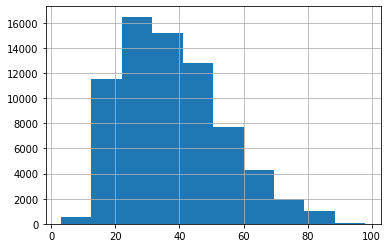

In [165]:
p = test["Age_of_Driver"].hist()

In [166]:
Age_mean = test["Age_of_Driver"].mean()
Age_median = test["Age_of_Driver"].median()
print("Age of Driver mean: {0:.4f}, median: {1:.4f}".format(Age_mean, Age_median))


Age of Driver mean: 37.8645, median: 36.0000


In [167]:
test["Age_of_Driver"].fillna(Age_median, inplace=True)
test["Age_of_Driver"].isna().sum() 

0

In [168]:
AgeV_mean = test["Age_of_Vehicle"].mean()
AgeV_median = test["Age_of_Vehicle"].median()
print("Age of Vehicle mean: {0:.4f}, median: {1:.4f}".format(AgeV_mean, AgeV_median))

Age of Vehicle mean: 6.6582, median: 6.0000


In [169]:
test["Age_of_Vehicle"].fillna(AgeV_median, inplace=True)
test["Age_of_Vehicle"].isna().sum() 

0

In [170]:
Engine_mean = test["Engine_Capacity_(CC)"].mean()
Engine_median = test["Engine_Capacity_(CC)"].median()
print("Engine_Capacity_(CC) mean: {0:.4f}, median: {1:.4f}".format(Engine_mean, Engine_median))

Engine_Capacity_(CC) mean: 1918.8084, median: 1597.0000


In [171]:
test["Engine_Capacity_(CC)"].fillna(Engine_median, inplace=True)
test["Engine_Capacity_(CC)"].isna().sum() 

0

In [172]:
test.isna().sum()

Accident_Severity           0
Day_of_Week                 0
1st_Road_Class              0
Road_Type                   0
Light_Conditions            0
Weather_Conditions          0
Road_Surface_Conditions    80
Urban_or_Rural_Area         0
Vehicle_Type               14
Sex_of_Driver               7
Age_of_Driver               0
Engine_Capacity_(CC)        0
Age_of_Vehicle              0
dtype: int64

In [173]:
test["Road_Surface_Conditions"].value_counts()

1.0    54700
2.0    23007
4.0     1147
3.0      358
5.0       90
Name: Road_Surface_Conditions, dtype: int64

In [174]:
test["Road_Surface_Conditions"].fillna(1.0, inplace=True)
test["Road_Surface_Conditions"].isna().sum() 

0

In [175]:
test["Vehicle_Type"].value_counts()

9.0     55695
5.0      4434
1.0      3929
19.0     3514
21.0     2463
3.0      2121
11.0     2018
2.0      1321
8.0      1180
4.0       908
20.0      698
90.0      532
10.0      281
17.0      230
16.0       32
18.0       12
Name: Vehicle_Type, dtype: int64

In [176]:
test["Vehicle_Type"].fillna(9.0, inplace=True)
test["Vehicle_Type"].isna().sum() 

0

In [177]:
test.isna().sum()

Accident_Severity          0
Day_of_Week                0
1st_Road_Class             0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Vehicle_Type               0
Sex_of_Driver              7
Age_of_Driver              0
Engine_Capacity_(CC)       0
Age_of_Vehicle             0
dtype: int64

In [178]:
test["Sex_of_Driver"].value_counts()

1.0    56005
2.0    19020
3.0     4350
Name: Sex_of_Driver, dtype: int64

In [179]:
test["Sex_of_Driver"].fillna(1.0, inplace=True)
test["Sex_of_Driver"].isna().sum() 

0

7. Pomocou konfigenčnej tabuľky vyjadrite závislosti medzi nasledujúcimi atribútmi a cieľovým atribútom `Accident_Severity`:
* `Day_of_Week` 
* `Sex_of_Driver`
* `Age_of_Driver` (nutné diskretizovať tento atribút)

Použite niektorú z vizualizácií knižnice seaborn na grafické zobrazenie týchto vzťahov. (5b)

In [180]:
test["Age_ordinal"] = pd.qcut(test["Age_of_Driver"], 3)
test["Age_ordinal"].value_counts()

(2.999, 30.0]    27100
(41.0, 98.0]     26317
(30.0, 41.0]     25965
Name: Age_ordinal, dtype: int64

In [181]:
test["Age_ordinal"] = pd.cut(test["Age_of_Driver"], bins=[0, 30, 41, 100], include_lowest=True, labels=["Early adulthood", "Middle Adulthood", "Late Adulthood"])
test["Age_ordinal"].value_counts()

Early adulthood     27100
Late Adulthood      26317
Middle Adulthood    25965
Name: Age_ordinal, dtype: int64

In [182]:
pd.pivot_table(test, index=["Age_ordinal", "Sex_of_Driver"], columns="Day_of_Week", values="Accident_Severity", aggfunc="mean")
#pd.pivot_table(data, index=["sex", "pclass"], columns="age_ordinal", values="survived", aggfunc="mean")

Day_of_Week                            1         2         3         4  \
Age_ordinal      Sex_of_Driver                                           
Early adulthood  1.0            2.260501  2.289203  2.322234  2.325376   
                 2.0            2.378162  2.473118  2.469667  2.440349   
                 3.0            2.142857  2.857143  2.428571  2.461538   
Middle Adulthood 1.0            2.264054  2.366744  2.368330  2.355434   
                 2.0            2.386667  2.501754  2.476190  2.483660   
                 3.0            2.348409  2.486381  2.397338  2.421687   
Late Adulthood   1.0            2.195709  2.292340  2.282114  2.302966   
                 2.0            2.283019  2.399374  2.445905  2.421596   
                 3.0            2.250000  2.000000  2.111111  2.666667   

Day_of_Week                            5         6         7  
Age_ordinal      Sex_of_Driver                                
Early adulthood  1.0            2.324188  2.295658  2.229289  
                 2.0            2.505664  2.480462  2.410367  
                 3.0            2.357143  2.400000  2.250000  
Middle Adulthood 1.0            2.359555  2.353311  2.307528  
                 2.0            2.476082  2.478261  2.417445  
                 3.0            2.387889  2.429851  2.352507  
Late Adulthood   1.0            2.292434  2.280277  2.267264  
                 2.0            2.385740  2.394353  2.312727  
                 3.0            2.285714  2.500000  2.222222

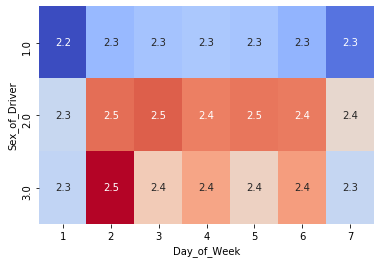

In [183]:
import seaborn as sns
heatmap_data = pd.pivot_table(test, values='Accident_Severity', index=['Sex_of_Driver'], columns='Day_of_Week') # vytvoríme pivot table - hodnoty celkového účtu podľa veľkosti skupinky a dňa
g = sns.heatmap(heatmap_data, annot=True, cmap="coolwarm",  cbar=False)                   # vykreslíme heatmapu

In [213]:
factors = test[["Accident_Severity", "Day_of_Week", "Sex_of_Driver", "Age_of_Driver"]]
corr_table = factors.corr()
corr_table

,Accident_Severity,Day_of_Week,Sex_of_Driver,Age_of_Driver
Accident_Severity,1.000000,0.003154,0.086339,-0.031414
Day_of_Week,0.003154,1.000000,0.003534,-0.001479
Sex_of_Driver,0.086339,0.003534,1.000000,-0.014713
Age_of_Driver,-0.031414,-0.001479,-0.014713,1.000000


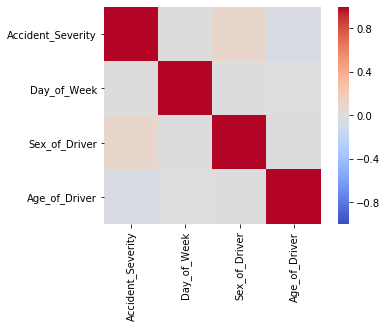

In [214]:
p = sns.heatmap(corr_table,
                xticklabels=corr_table.columns, yticklabels=corr_table.columns,
                vmin=-1, vmax=1, 
                cmap='coolwarm', 
                square=True)   

8. Vytvorte dátovú množinu, v ktorej nahradíte všetky nominálne atribúty za číselné alebo binárne. (3b)

In [144]:
test.info()
#test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79382 entries, 0 to 79381
Data columns (total 14 columns):
Accident_Severity          79382 non-null int64
Day_of_Week                79382 non-null int64
1st_Road_Class             79382 non-null int64
Road_Type                  79382 non-null int64
Light_Conditions           79382 non-null int64
Weather_Conditions         79382 non-null int64
Road_Surface_Conditions    79382 non-null float64
Urban_or_Rural_Area        79382 non-null int64
Vehicle_Type               79382 non-null float64
Sex_of_Driver              79382 non-null float64
Age_of_Driver              79382 non-null float64
Engine_Capacity_(CC)       79382 non-null float64
Age_of_Vehicle             79382 non-null float64
Age_ordinal                79382 non-null category
dtypes: category(1), float64(6), int64(7)
memory usage: 8.6 MB


In [184]:
Accidents.shape

(79382, 53)

In [185]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
Accidents_1 =  test.drop('Age_ordinal', axis=1)
Accidents_1 = pd.DataFrame(scaler.fit_transform(Accidents_1), index=Accidents_1.index, columns=Accidents_1.columns)
Accidents_1.shape

(79382, 13)

In [186]:
Accidents_1 = pd.get_dummies(test, columns=['1st_Road_Class', 'Road_Type', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Vehicle_Type']) 

In [187]:
Accidents_1.head()

,Accident_Severity,Day_of_Week,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Age_ordinal,1st_Road_Class_1,1st_Road_Class_2,1st_Road_Class_3,...,Vehicle_Type_9.0,Vehicle_Type_10.0,Vehicle_Type_11.0,Vehicle_Type_16.0,Vehicle_Type_17.0,Vehicle_Type_18.0,Vehicle_Type_19.0,Vehicle_Type_20.0,Vehicle_Type_21.0,Vehicle_Type_90.0
0,3,2,1.0,36.0,1597.0,6.0,Middle Adulthood,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3,2,1.0,26.0,1597.0,6.0,Early adulthood,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,5,2.0,72.0,998.0,5.0,Late Adulthood,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,5,2.0,44.0,1461.0,1.0,Late Adulthood,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3,5,1.0,40.0,2461.0,1.0,Middle Adulthood,1,0,0,...,0,0,0,0,0,0,1,0,0,0


9. Rozdeľte dáta na trénovaciu a testovaciu množinu v pomere 70/30. Ako cieľový atribút použite atribút `Accident_Severity`. (2b)

In [188]:
from sklearn.model_selection import train_test_split
X_Accidents_1 = Accidents_1.drop(['Accident_Severity', 'Age_ordinal'], axis=1 )
X_Accidents_1.shape

(79382, 55)

In [189]:
y_Accidents_1 = Accidents["Accident_Severity"]
y_Accidents_1.shape

(79382,)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X_Accidents_1, y_Accidents_1, test_size=0.3, random_state=1)

In [191]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55567 entries, 18230 to 77708
Data columns (total 55 columns):
Day_of_Week                    55567 non-null int64
Sex_of_Driver                  55567 non-null float64
Age_of_Driver                  55567 non-null float64
Engine_Capacity_(CC)           55567 non-null float64
Age_of_Vehicle                 55567 non-null float64
1st_Road_Class_1               55567 non-null uint8
1st_Road_Class_2               55567 non-null uint8
1st_Road_Class_3               55567 non-null uint8
1st_Road_Class_4               55567 non-null uint8
1st_Road_Class_5               55567 non-null uint8
1st_Road_Class_6               55567 non-null uint8
Road_Type_1                    55567 non-null uint8
Road_Type_2                    55567 non-null uint8
Road_Type_3                    55567 non-null uint8
Road_Type_6                    55567 non-null uint8
Road_Type_7                    55567 non-null uint8
Road_Type_9                    55567 non-null u

10. Spočítajte pomocou funkcie `SelectKBest` a `mutual_score_info` významosti jednotlivých atribútov pre predikciu v trénovacej množine. Skúste získané informácie využiť pri predspracovaní dát pre niektoré z modelov. (3b)

In [193]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train, y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x000001E2CDB358C8>)

Atribut 0: 0.002238
Atribut 1: 0.007463
Atribut 2: 0.004631
Atribut 3: 0.016738
Atribut 4: 0.000000
Atribut 5: 0.005326
Atribut 6: 0.000753
Atribut 7: 0.000000
Atribut 8: 0.003275
Atribut 9: 0.000000
Atribut 10: 0.002786
Atribut 11: 0.004299
Atribut 12: 0.000000
Atribut 13: 0.003446
Atribut 14: 0.004290
Atribut 15: 0.000000
Atribut 16: 0.002047
Atribut 17: 0.005106
Atribut 18: 0.001578
Atribut 19: 0.001762
Atribut 20: 0.012997
Atribut 21: 0.000000
Atribut 22: 0.003223
Atribut 23: 0.001802
Atribut 24: 0.002392
Atribut 25: 0.000258
Atribut 26: 0.002258
Atribut 27: 0.000000
Atribut 28: 0.000000
Atribut 29: 0.000000
Atribut 30: 0.000882
Atribut 31: 0.001715
Atribut 32: 0.001921
Atribut 33: 0.000973
Atribut 34: 0.000539
Atribut 35: 0.000756
Atribut 36: 0.018429
Atribut 37: 0.018985
Atribut 38: 0.000000
Atribut 39: 0.001448
Atribut 40: 0.000000
Atribut 41: 0.004210
Atribut 42: 0.001033
Atribut 43: 0.005186
Atribut 44: 0.002378
Atribut 45: 0.010770
Atribut 46: 0.003268
Atribut 47: 0.000000
At

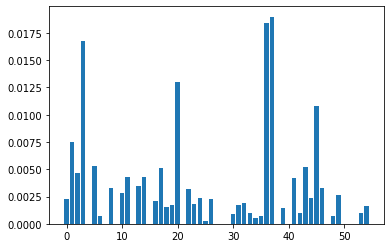

In [194]:
import matplotlib.pyplot as plt
for i in range(len(fs.scores_)):
	print('Atribut %d: %f' % (i, fs.scores_[i]))
    
    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

11. Natrénujte rôzne klasifikačné modely pre predikciu atribútu `Accident_Severity`. Natrénujte nasledovné modely s prednastavenými parametrami:
* k-najbližších susedov
* Rozhodovacie stromy
* Random forests

Jednotlivé modely otestujte pomocou 10-násobnej krížovej validácie pomocou metriky `accuracy`. 

Pozor - pre jednotlivé modely zvoľte vhodný spôsob predspracovania (možná modifikácia predspracovania v kroku 8). (6b) 

In [206]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier() 
k_range = list(range(1, 11))
weights_range = ["uniform", "distance"]
metric_range = ["euclidean", "manhattan"]
param_grid = dict(n_neighbors=k_range, weights=weights_range, metric=metric_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [207]:
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='accuracy') 
grid.fit(X_train, y_train) 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [208]:
print("Najlepšie parametre sú:")
print()
print(grid.best_params_)
print()
print(grid.best_score_)

Najlepšie parametre sú:

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}

0.5227203196141594


In [209]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform',metric='manhattan') 
knn.fit(X_train, y_train)                 
y_knn = knn.predict(X_test)  

In [210]:
print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_model)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test, y_model)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_model)}")

Presnosť (accuracy) modelu: 0.5030023094688222


NameError: name 'precision_score' is not defined

In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(max_depth=3)  
dt.fit(X_train, y_train)  
y_dt = dt.predict(X_test)      

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_dt)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test, y_dt, average=None)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_dt, average=None)}")

cm = confusion_matrix(y_test, y_dt) 
print(cm)

Presnosť (accuracy) modelu: 0.5573798026453916
Presnosť (precision) modelu: [0.         0.5622041  0.54392107]
Návratnosť (recall) modelu: [0.         0.7823464  0.35139303]
[[   0 1366  124]
 [   0 9856 2742]
 [   0 6309 3418]]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [235]:
n_estimators_range = [100, 500, 1000]
oob_score_range = [True, False]
criterion_range = ["gini", "entropy"]
max_depth_range = [3, 4, 5, 6]

In [241]:
param_grid = dict(criterion=criterion_range, max_depth=max_depth_range, n_estimators=n_estimators_range, oob_score=oob_score_range)
print(param_grid2)

{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6], 'n_estimators': [100, 500, 1000], 'oob_score': [True, False]}


In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
rf = RandomForestClassifier

In [243]:
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy') 
grid.fit(X_train, y_train)

TypeError: Cannot clone object '<class 'sklearn.ensemble.forest.RandomForestClassifier'>' (type <class 'abc.ABCMeta'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [199]:
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_rf)}")
cm = confusion_matrix(y_test, y_rf)
print(cm)

Presnosť (accuracy) modelu: 0.5317656938904052
[[    0  1488     2]
 [    0 12537    61]
 [    0  9600   127]]


In [ ]:
# YOUR CODE HERE

13. Natrénujte na celej trénovacej množine model s najlepšími parametrami. Model otestujte na testovacej množine. Vyhodnoťte model pomocou metrík `accuracy`, `precision` a `recall`. Vypíšte preň `confusion matrix`. (3b)

In [1]:
# YOUR CODE HERE